<a href="https://colab.research.google.com/github/paiml/minimal-python/blob/master/Chapter7_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [29]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [30]:
df.tail()

,date,state,fips,cases,deaths
1934,2020-04-06,Virginia,51,2878,54
1935,2020-04-06,Washington,53,8384,383
1936,2020-04-06,West Virginia,54,345,4
1937,2020-04-06,Wisconsin,55,2440,83
1938,2020-04-06,Wyoming,56,212,0


*What are the columns?*

In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [31]:
df.shape

(1939, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [32]:
df.describe()

,fips,cases,deaths
count,1939.000000,1939.000000,1939.000000
mean,30.892728,1467.224342,34.104177
std,18.062123,7403.847224,210.798255
min,1.000000,1.000000,0.000000
25%,17.000000,7.000000,0.000000
50%,30.000000,75.000000,1.000000
75%,46.000000,565.000000,10.000000
max,78.000000,130703.000000,4758.000000


*Cases and Deaths in the USA due to Covid-19*

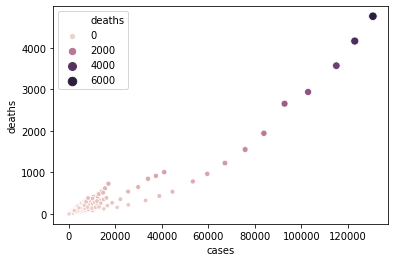

In [33]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-06', '2020-04-06', '2020-04-06', '2020-04-06',
               '2020-04-06', '2020-04-06', '2020-04-06', '2020-04-06',
               '2020-04-06', '2020-04-06'],
              dtype='datetime64[ns]', name='date', length=1939, freq=None)

*Filter results by date range*

In [35]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2020-04-08
Two days ago 2020-04-06


In [36]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2020-04-06,Alabama,1,2006,53
2020-04-06,Alaska,2,189,4
2020-04-06,Arizona,4,2465,67
2020-04-06,Arkansas,5,927,16
2020-04-06,California,6,16284,386


*The distribution of the data by date*

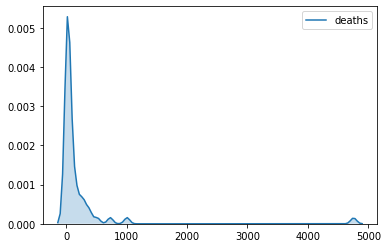

In [37]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [38]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-06,New York,36,130703,4758
2020-04-06,New Jersey,34,41090,1005
2020-04-06,Michigan,26,17130,727
2020-04-06,Louisiana,22,14867,512
2020-04-06,California,6,16284,386
2020-04-06,Washington,53,8384,383
2020-04-06,Illinois,17,12262,309
2020-04-06,Georgia,13,7558,294
2020-04-06,Massachusetts,25,13837,260


*There should be 50 states and District of Columbia*

In [39]:
current_df.shape

(55, 4)

### State Based Analysis

*Get 10 states and subset*

In [40]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'California',
 'Washington',
 'Illinois',
 'Georgia',
 'Massachusetts',
 'Florida']

In [ ]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [41]:
set(top_states_df.state.values)

{'California',
 'Florida',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Washington'}

<Figure size 1080x360 with 0 Axes>

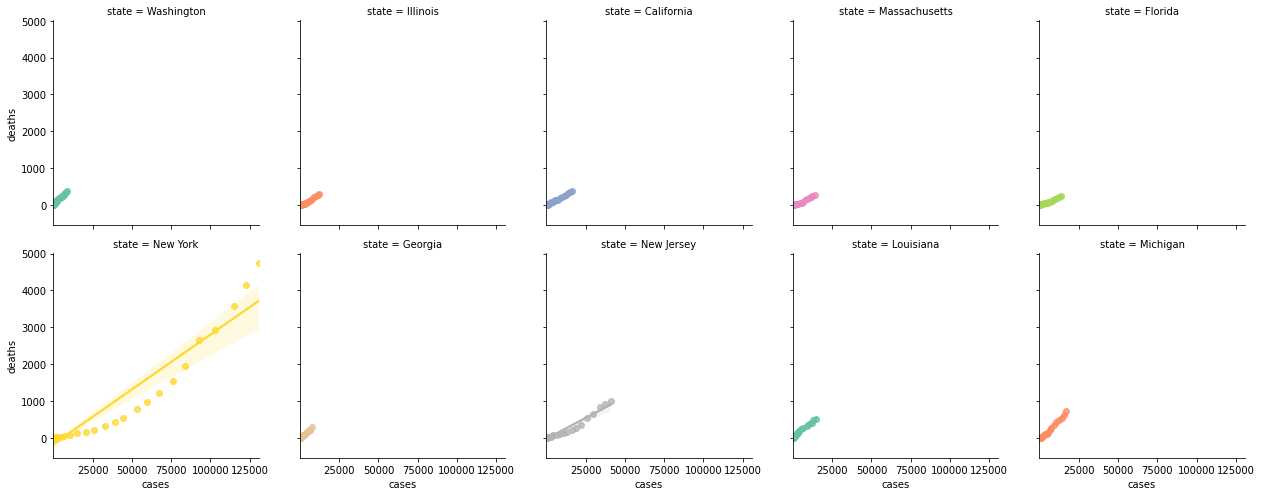

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [43]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-09,Louisiana,1,0
2020-03-10,Michigan,2,0
2020-03-11,Michigan,2,0
2020-03-08,New Jersey,6,0
2020-03-10,Louisiana,6,0


In [44]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [45]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [46]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [47]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [48]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


*Generate Heatmap*

In [49]:
sugar_covid_df.corr()

,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,0.053269,0.042491,0.231301,-0.228550,0.228550
cases,0.053269,1.000000,0.961783,-0.148097,0.221247,-0.221247
deaths,0.042491,0.961783,1.000000,-0.119988,0.178478,-0.178478
employed-sugar-intake-daily,0.231301,-0.148097,-0.119988,1.000000,-0.761812,0.761812
Democrats,-0.228550,0.221247,0.178478,-0.761812,1.000000,-1.000000
Republicans,0.228550,-0.221247,-0.178478,0.761812,-1.000000,1.000000


In [50]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [ ]:
sugar_covid_df.to_csv("covid-eda.csv")

*What about Real-Estate Data?*

## Modeling

## Conclusion
